In [1]:
import pandas as pd
%matplotlib inline
pd.set_option("display.max_columns",200)

In [2]:
import sys
sys.path.insert(1, '../../../usr_lib/')
import utilities

In [3]:
"""
1. Load data
2. Preliminar Data exploration
3. Data cleaning and variable engineering
4. After cleaning Data exploration
5. Feature selection
6. Modeling
"""

'\n1. Load data\n2. Preliminar Data exploration\n3. Data cleaning and variable engineering\n4. After cleaning Data exploration\n5. Feature selection\n6. Modeling\n'

# 1. Load data

In [4]:
import os
path = '../../../data/modulo2/examen/dataexam2/'
os.listdir(path)

['Credit Cards Transactions.zip',
 'credit_card_transactions-ibm_v2.csv',
 'sd254_cards.csv',
 'sd254_users.csv',
 'User0_credit_card_transactions.csv',
 'fraud_detection.csv',
 'pivot1.xlsx',
 'pivot2.xlsx',
 'pivot3.xlsx',
 'pivot4.xlsx',
 'backup_data.csv',
 'catboost.pkl']

In [5]:
df = pd.read_csv(path + 'fraud_detection.csv')

# 2. Preliminar data exploration

In [6]:
df.head()

,id,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,tgt
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,0,0,2003,6,28,13:19,$10.55,Swipe Transaction,-1605794445852049456,La Verne,CA,91750.0,5812,NaN,No
1,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,0,0,2003,10,14,20:19,$58.47,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,NaN,No
2,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,0,0,2004,8,8,06:15,$129.18,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,0,0,2006,9,4,09:55,$48.86,Swipe Transaction,3952145593743244256,La Verne,CA,91750.0,7538,NaN,No
4,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,0,0,2010,6,10,17:43,$5.29,Online Transaction,-2042049018365856408,ONLINE,NaN,NaN,5815,NaN,No


In [7]:
df.shape

(73976, 46)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73976 entries, 0 to 73975
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           73976 non-null  int64  
 1   Person                       73976 non-null  object 
 2   Current Age                  73976 non-null  int64  
 3   Retirement Age               73976 non-null  int64  
 4   Birth Year                   73976 non-null  int64  
 5   Birth Month                  73976 non-null  int64  
 6   Gender                       73976 non-null  object 
 7   Address                      73976 non-null  object 
 8   Apartment                    19451 non-null  float64
 9   City                         73976 non-null  object 
 10  State                        73976 non-null  object 
 11  Zipcode                      73976 non-null  int64  
 12  Latitude                     73976 non-null  float64
 13  Longitude       

### Etiquetado de variables

In [9]:
c_vars = ['Current Age', 'Retirement Age', 'FICO Score', 'Num Credit Cards', 'Cards Issued', 'Credit Limit',
         'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Amount', 'Total Debt']

v_vars = ['Gender', 'Apartment', 'Card Brand', 'Card Type', 'Has Chip', 'Card on Dark Web', 'Use Chip', 'MCC',
         'Errors?']

g_vars = ['City', 'State', 'Zipcode', 'Latitude', 'Longitude', 'Zip', 'Merchant City', 'Merchant State']

d_vars = ['Birth Year', 'Birth Month', 'Expires', 'Acct Open Date', 'Year PIN last Changed', 'Year', 'Month', 
         'Day', 'Time']

t_vars = ['id', 'Person', 'CARD INDEX', 'Card Number', 'CVV', 'User', 'Card', 'Merchant Name', 'Address']

In [10]:
df = utilities.rename_variables(df, c_vars, 'c_')
df = utilities.rename_variables(df, v_vars, 'v_')
df = utilities.rename_variables(df, g_vars, 'g_')
df = utilities.rename_variables(df, d_vars, 'd_')
df = utilities.rename_variables(df, t_vars, 't_')

df.rename(columns={'v_errors?':'v_errors'}, inplace=True)

In [11]:
df['v_errors'].value_counts(dropna=False)

NaN                                     71936
Insufficient Balance                      857
Bad PIN                                   420
Bad CVV                                   307
Technical Glitch                          158
Bad Card Number                           135
Bad Expiration                            135
Bad PIN,Insufficient Balance               11
Bad CVV,Insufficient Balance                4
Bad Zipcode                                 3
Bad PIN,Technical Glitch                    2
Bad Expiration,Bad CVV                      2
Bad Expiration,Technical Glitch             2
Bad Card Number,Insufficient Balance        2
Bad Expiration,Insufficient Balance         1
Bad CVV,Technical Glitch                    1
Name: v_errors, dtype: int64

In [12]:
df['v_errors'].fillna(value='No error', inplace=True)

In [13]:
df.groupby(['tgt', 'v_errors']).count()

t_id  t_person  c_current age  \
tgt v_errors                                                               
No  Bad CVV                                  27        27             27   
    Bad Card Number                          30        30             30   
    Bad Expiration                           15        15             15   
    Bad PIN                                 118       118            118   
    Bad PIN,Insufficient Balance              4         4              4   
    Bad PIN,Technical Glitch                  1         1              1   
    Bad Zipcode                               3         3              3   
    Insufficient Balance                    461       461            461   
    No error                              43465     43465          43465   
    Technical Glitch                         95        95             95   
Yes Bad CVV                                 280       280            280   
    Bad CVV,Insufficient Balance              4         4              4   
    Bad CVV,Technical Glitch                  1         1              1   
    Bad Card Number                         105       105            105   
    Bad Card Number,Insufficient Balance      2         2              2   
    Bad Expiration                          120       120            120   
    Bad Expiration,Bad CVV                    2         2              2   
    Bad Expiration,Insufficient Balance       1         1              1   
    Bad Expiration,Technical Glitch           2         2              2   
    Bad PIN                                 302       302            302   
    Bad PIN,Insufficient Balance              7         7              7   
    Bad PIN,Technical Glitch                  1         1              1   
    Insufficient Balance                    396       396            396   
    No error                              28471     28471          28471   
    Technical Glitch                         63        63             63   

                                          c_retirement age  d_birth year  \
tgt v_errors                                                               
No  Bad CVV                                             27            27   
    Bad Card Number                                     30            30   
    Bad Expiration                                      15            15   
    Bad PIN                                            118           118   
    Bad PIN,Insufficient Balance                         4             4   
    Bad PIN,Technical Glitch                             1             1   
    Bad Zipcode                                          3             3   
    Insufficient Balance                               461           461   
    No error                                         43465         43465   
    Technical Glitch                                    95            95   
Yes Bad CVV                                            280           280   
    Bad CVV,Insufficient Balance                         4             4   
    Bad CVV,Technical Glitch                             1             1   
    Bad Card Number                                    105           105   
    Bad Card Number,Insufficient Balance                 2             2   
    Bad Expiration                                     120           120   
    Bad Expiration,Bad CVV                               2             2   
    Bad Expiration,Insufficient Balance                  1             1   
    Bad Expiration,Technical Glitch                      2             2   
    Bad PIN                                            302           302   
    Bad PIN,Insufficient Balance                         7             7   
    Bad PIN,Technical Glitch                             1             1   
    Insufficient Balance                               396           396   
    No error                                         28471         28471   
    Technical 

In [14]:
# Debido a su relación con la variable objetivo, se optará por no normalizar la variable errors

In [15]:
df.head()

,t_id,t_person,c_current age,c_retirement age,d_birth year,d_birth month,v_gender,t_address,v_apartment,g_city,g_state,g_zipcode,g_latitude,g_longitude,c_per capita income - zipcode,c_yearly income - person,c_total debt,c_fico score,c_num credit cards,t_card index,v_card brand,v_card type,t_card number,d_expires,t_cvv,v_has chip,c_cards issued,c_credit limit,d_acct open date,d_year pin last changed,v_card on dark web,t_user,t_card,d_year,d_month,d_day,d_time,c_amount,v_use chip,t_merchant name,g_merchant city,g_merchant state,g_zip,v_mcc,v_errors,tgt
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,0,0,2003,6,28,13:19,$10.55,Swipe Transaction,-1605794445852049456,La Verne,CA,91750.0,5812,No error,No
1,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,0,0,2003,10,14,20:19,$58.47,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,No error,No
2,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,0,0,2004,8,8,06:15,$129.18,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,No error,No
3,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,0,0,2006,9,4,09:55,$48.86,Swipe Transaction,3952145593743244256,La Verne,CA,91750.0,7538,No error,No
4,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,0,0,2010,6,10,17:43,$5.29,Online Transaction,-2042049018365856408,ONLINE,NaN,NaN,5815,No error,No


### Variables irrelevantes - primer barrido
- v_apartment
- t_adress
- t_person
- t_id
- t_card number
- t_csv
- t_user
- t_card

In [16]:
df.drop(['v_apartment', 't_address', 't_person','t_id','t_card number','t_cvv','t_user','t_card'], axis=1, inplace=True)

In [17]:
df['t_merchant name'].value_counts(dropna=False)

-4282466774399734331    3634
 1913477460590765860    2598
 1799189980464955940    2221
 2027553650310142703    2010
-5162038175624867091    1353
                        ... 
 6454972078905765777       1
 8887649356995731585       1
 6138738304056123795       1
 307076894249395349        1
-6335581086960426154       1
Name: t_merchant name, Length: 9307, dtype: int64

In [18]:
df.drop(['t_merchant name'], axis=1, inplace=True)

In [19]:
df['g_merchant state'].value_counts(dropna=False)

NaN             23239
CA               5459
Italy            4694
TX               3612
FL               3022
                ...  
Israel              1
South Africa        1
Lithuania           1
Serbia              1
Peru                1
Name: g_merchant state, Length: 107, dtype: int64

In [20]:
pivot1 = df.groupby(['tgt', 'g_merchant state']).count()

In [21]:
pivot1.to_excel(path + 'pivot1.xlsx')

In [22]:
pivot2 = df.groupby(['tgt', 'v_errors']).count()
pivot2.to_excel(path + 'pivot2.xlsx')

In [23]:
pivot3 = df.groupby(['tgt', 'g_merchant city']).count()
pivot3.to_excel(path + 'pivot3.xlsx')

In [24]:
pivot4 = df.groupby(['tgt', 'g_merchant city', 'v_errors']).count()
pivot4.to_excel(path + 'pivot4.xlsx')

# 3. Data cleaning and variable engineering

### Analizando las anteriores tablas pivote, se encontró como valioso crear una variable predictora basada en los errores, ya que hay 4 tipos de errores específicamente que debido a su proporción respecto a la variable objetivo, probabilizan que se trate de un fraude, estos tipo de error son BAD CVV, BAD CARD NUMBER, BAD EXPIRATION, BAD PIN. Adicional a lo anterior, se encontró una proporción bastante elevada para las transacciones online. por lo que una buena variable predictora sería una bandera que se encienda si la transacción es online y presenta estos erroes. De esta relación, la combinación que definitivamente puede aportar una variable predictira fuerte, es el error BAD CVV + transacción online. Con una proporción de 10 a 1 para los fraudes.

In [25]:
def high_probability_of_fraud(error):
    error = error.lower().lstrip().strip()
    if error == 'bad cvv':
        return 10.37
    elif error == 'bad card number':
        return 3.5
    elif error == 'bad expiration':
        return 8
    elif error == 'bad pin':
        return 2.55
    else:
        return 0
    pass

In [26]:
df['c_high fraud proba'] = df['v_errors'].map(high_probability_of_fraud)

In [27]:
df.head()

,c_current age,c_retirement age,d_birth year,d_birth month,v_gender,g_city,g_state,g_zipcode,g_latitude,g_longitude,c_per capita income - zipcode,c_yearly income - person,c_total debt,c_fico score,c_num credit cards,t_card index,v_card brand,v_card type,d_expires,v_has chip,c_cards issued,c_credit limit,d_acct open date,d_year pin last changed,v_card on dark web,d_year,d_month,d_day,d_time,c_amount,v_use chip,g_merchant city,g_merchant state,g_zip,v_mcc,v_errors,tgt,c_high fraud proba
0,53,66,1966,11,Female,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,12/2022,YES,2,$24295,09/2002,2008,No,2003,6,28,13:19,$10.55,Swipe Transaction,La Verne,CA,91750.0,5812,No error,No,0.0
1,53,66,1966,11,Female,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,12/2022,YES,2,$24295,09/2002,2008,No,2003,10,14,20:19,$58.47,Swipe Transaction,Mira Loma,CA,91752.0,5812,No error,No,0.0
2,53,66,1966,11,Female,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,12/2022,YES,2,$24295,09/2002,2008,No,2004,8,8,06:15,$129.18,Swipe Transaction,Monterey Park,CA,91754.0,5411,No error,No,0.0
3,53,66,1966,11,Female,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,12/2022,YES,2,$24295,09/2002,2008,No,2006,9,4,09:55,$48.86,Swipe Transaction,La Verne,CA,91750.0,7538,No error,No,0.0
4,53,66,1966,11,Female,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0,Visa,Debit,12/2022,YES,2,$24295,09/2002,2008,No,2010,6,10,17:43,$5.29,Online Transaction,ONLINE,NaN,NaN,5815,No error,No,0.0


In [28]:
from re import sub
from decimal import Decimal
def money_formartting(amount):
    return Decimal(sub(r'[^\d.]', '', amount))

In [29]:
df['c_per capita income - zipcode'] = df['c_per capita income - zipcode'].map(money_formartting)
df['c_yearly income - person'] = df['c_yearly income - person'].map(money_formartting)
df['c_total debt'] = df['c_total debt'].map(money_formartting)
df['c_credit limit'] = df['c_credit limit'].map(money_formartting)
df['c_amount'] = df['c_amount'].map(money_formartting)

In [30]:
df['g_zip'].fillna(value=0, inplace=True)
df['g_zip'] = df['g_zip'].astype(int)

In [31]:
df['g_merchant state'].fillna(value='ONLINE', inplace=True)

### Creamos una nueva variable para calcular la distancia entre el el lugar de residencia de la persona y el lugar en el que se realizó la transacción para analizar la relación entre la distancia y la propención al fraude

In [32]:
states = list(df['g_state'].unique())
states

['CA',
 'NY',
 'IA',
 'KY',
 'PA',
 'LA',
 'RI',
 'MI',
 'TX',
 'OK',
 'AZ',
 'NC',
 'OH',
 'AR',
 'TN',
 'FL',
 'AL',
 'IL',
 'MA',
 'KS',
 'WI',
 'GA',
 'SC',
 'WV',
 'WA',
 'UT',
 'MD',
 'NJ',
 'MT',
 'CO',
 'MN',
 'IN',
 'DE',
 'ID',
 'MS',
 'CT',
 'OR',
 'VT',
 'NV',
 'NH',
 'NM',
 'VA',
 'ME',
 'ND',
 'MO',
 'AK',
 'HI',
 'SD',
 'NE',
 'DC',
 'WY']

In [33]:
df['g_zipcode'] = df['g_zipcode'].astype(str)
df['g_zip'] = df['g_zip'].astype(str)

In [34]:
import pgeocode
dist = pgeocode.GeoDistance('US')
def distance_calculation(p_zip, c_zip, c_state):
    if c_state not in states:
        return 99999 #fuera del país
    else:
        return dist.query_postal_code(p_zip, c_zip)

In [35]:
# df['c_km'] = df[['g_zipcode', 'g_zip', 'g_merchant state']].apply(distance_calculation)
%time df['c_km'] = df.apply(lambda x: distance_calculation(p_zip=x['g_zipcode'], c_zip=x['g_zip'], c_state=x['g_merchant state']), axis=1)

CPU times: user 20min 31s, sys: 447 ms, total: 20min 31s
Wall time: 20min 45s


In [36]:
df['c_km'].fillna(value=0, inplace=True)

In [37]:
df['d_current_year'] = 2020 #since the oldest transacction ocurred in 2020, we could say, the current year is 2020. So... this year will be the measurement for calculating the age of the pin code

In [38]:
df['c_pass_age'] = 2020 - df['d_year pin last changed']

In [39]:
df['c_pass_age'].value_counts()

9     12770
10    11710
11     7689
8      7159
7      5788
12     5606
6      5477
5      4320
13     3731
4      2399
14     1743
3      1358
2      1338
15     1009
1       640
0       633
17      312
16      272
18       22
Name: c_pass_age, dtype: int64

In [40]:
df.head()

,c_current age,c_retirement age,d_birth year,d_birth month,v_gender,g_city,g_state,g_zipcode,g_latitude,g_longitude,c_per capita income - zipcode,c_yearly income - person,c_total debt,c_fico score,c_num credit cards,t_card index,v_card brand,v_card type,d_expires,v_has chip,c_cards issued,c_credit limit,d_acct open date,d_year pin last changed,v_card on dark web,d_year,d_month,d_day,d_time,c_amount,v_use chip,g_merchant city,g_merchant state,g_zip,v_mcc,v_errors,tgt,c_high fraud proba,c_km,d_current_year,c_pass_age
0,53,66,1966,11,Female,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5,0,Visa,Debit,12/2022,YES,2,24295,09/2002,2008,No,2003,6,28,13:19,10.55,Swipe Transaction,La Verne,CA,91750,5812,No error,No,0.0,0.000000,2020,12
1,53,66,1966,11,Female,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5,0,Visa,Debit,12/2022,YES,2,24295,09/2002,2008,No,2003,10,14,20:19,58.47,Swipe Transaction,Mira Loma,CA,91752,5812,No error,No,0.0,26.513374,2020,12
2,53,66,1966,11,Female,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5,0,Visa,Debit,12/2022,YES,2,24295,09/2002,2008,No,2004,8,8,06:15,129.18,Swipe Transaction,Monterey Park,CA,91754,5411,No error,No,0.0,33.540588,2020,12
3,53,66,1966,11,Female,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5,0,Visa,Debit,12/2022,YES,2,24295,09/2002,2008,No,2006,9,4,09:55,48.86,Swipe Transaction,La Verne,CA,91750,7538,No error,No,0.0,0.000000,2020,12
4,53,66,1966,11,Female,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5,0,Visa,Debit,12/2022,YES,2,24295,09/2002,2008,No,2010,6,10,17:43,5.29,Online Transaction,ONLINE,ONLINE,0,5815,No error,No,0.0,99999.000000,2020,12


In [41]:
df['v_has chip'].unique()

array(['YES', 'NO'], dtype=object)

In [42]:
df['v_card type'].unique()

array(['Debit', 'Credit', 'Debit (Prepaid)'], dtype=object)

In [43]:
df.groupby(['v_card type', 'tgt']).count()

c_current age  c_retirement age  d_birth year  \
v_card type     tgt                                                  
Credit          No           13993             13993         13993   
                Yes          10089             10089         10089   
Debit           No           27253             27253         27253   
                Yes          16785             16785         16785   
Debit (Prepaid) No            2973              2973          2973   
                Yes           2883              2883          2883   

                     d_birth month  v_gender  g_city  g_state  g_zipcode  \
v_card type     tgt                                                        
Credit          No           13993     13993   13993    13993      13993   
                Yes          10089     10089   10089    10089      10089   
Debit           No           27253     27253   27253    27253      27253   
                Yes          16785     16785   16785    16785      16785   
Debit (Prepaid) No            2973      2973    2973     2973       2973   
                Yes           2883      2883    2883     2883       2883   

                     g_latitude  g_longitude  c_per capita income - zipcode  \
v_card type     tgt                                                           
Credit          No        13993        13993                          13993   
                Yes       10089        10089                          10089   
Debit           No        27253        27253                          27253   
                Yes       16785        16785                          16785   
Debit (Prepaid) No         2973         2973                           2973   
                Yes        2883         2883                           2883   

                     c_yearly income - person  c_total debt  c_fico score  \
v_card type     tgt                                                         
Credit          No                      13993         13993         13993   
                Yes                     10089         10089         10089   
Debit           No                      27253         27253         27253   
                Yes                     16785         16785         16785   
Debit (Prepaid) No                       2973          2973          2973   
                Yes                      2883          2883          2883   

                     c_num credit cards  t_card index  v_card brand  \
v_card type     tgt                                                   
Credit          No                13993         13993         13993   
                Yes               10089         10089         10089   
Debit           No                27253         27253         27253   
                Yes               16785         16785         16785   
Debit (Prepaid) No                 2973          2973          2973   
                Yes                2883          2883          2883   

                     d_expires  v_has chip  c_cards issued  c_credit limit  \
v_card type     tgt                                                          
Credit          No       13993       13993           13993           13993   
                Yes      10089       10089           10089           10089   
Debit           No       27253       27253           27253           27253   
                Yes      16785       16785           16785           16785   
Debit (Prepaid) No        2973        2973            2973            2973   
                Yes       2883        2883            2883            2883   

                     d_acct open date  d_year pin last changed  \
v_card type     tgt                                              
Credit          No              13993                    13993   
                Yes             10089                    10089   
Debit           No              27253                    27253   
                Yes             16785                    16785   
Debit (Prep

In [44]:
df['v_gender'].unique()

array(['Female', 'Male'], dtype=object)

In [45]:
df['v_card brand'].unique()

array(['Visa', 'Mastercard', 'Discover', 'Amex'], dtype=object)

In [46]:
df['v_use chip'].unique()

array(['Swipe Transaction', 'Online Transaction', 'Chip Transaction'],
      dtype=object)

In [47]:
df['v_card on dark web'].unique()

array(['No'], dtype=object)

In [48]:
# Encoding simpler categorical variables manually
df['tgt'] = df['tgt'].replace({'Yes':1, 'No':0})
df['v_has chip'] = df['v_has chip'].replace({'NO':0, 'YES':1})
df['v_card type'] = df['v_card type'].replace({'Debit (Prepaid)':0, 'Debit':0, 'Credit':1})
df['v_gender'] = df['v_gender'].replace({'Female':0, 'Male': 1})

In [49]:
df.head()

,c_current age,c_retirement age,d_birth year,d_birth month,v_gender,g_city,g_state,g_zipcode,g_latitude,g_longitude,c_per capita income - zipcode,c_yearly income - person,c_total debt,c_fico score,c_num credit cards,t_card index,v_card brand,v_card type,d_expires,v_has chip,c_cards issued,c_credit limit,d_acct open date,d_year pin last changed,v_card on dark web,d_year,d_month,d_day,d_time,c_amount,v_use chip,g_merchant city,g_merchant state,g_zip,v_mcc,v_errors,tgt,c_high fraud proba,c_km,d_current_year,c_pass_age
0,53,66,1966,11,0,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5,0,Visa,0,12/2022,1,2,24295,09/2002,2008,No,2003,6,28,13:19,10.55,Swipe Transaction,La Verne,CA,91750,5812,No error,0,0.0,0.000000,2020,12
1,53,66,1966,11,0,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5,0,Visa,0,12/2022,1,2,24295,09/2002,2008,No,2003,10,14,20:19,58.47,Swipe Transaction,Mira Loma,CA,91752,5812,No error,0,0.0,26.513374,2020,12
2,53,66,1966,11,0,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5,0,Visa,0,12/2022,1,2,24295,09/2002,2008,No,2004,8,8,06:15,129.18,Swipe Transaction,Monterey Park,CA,91754,5411,No error,0,0.0,33.540588,2020,12
3,53,66,1966,11,0,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5,0,Visa,0,12/2022,1,2,24295,09/2002,2008,No,2006,9,4,09:55,48.86,Swipe Transaction,La Verne,CA,91750,7538,No error,0,0.0,0.000000,2020,12
4,53,66,1966,11,0,La Verne,CA,91750,34.15,-117.76,29278,59696,127613,787,5,0,Visa,0,12/2022,1,2,24295,09/2002,2008,No,2010,6,10,17:43,5.29,Online Transaction,ONLINE,ONLINE,0,5815,No error,0,0.0,99999.000000,2020,12


procedemos a eliminar variables que por sentido común, no tienen relación con la variable objetivo. Por ejemplo:
- mes de nacimiento
- año de nacimiento (ya tenemos el current age)
- edad de retiro
- latitud y longitud, ya el cálculo de la distancia se llevó a cabo usando el CP
- el card index, esta variable no aporta nada
- La fecha de expiración
- el año de la trasacción, es irrelevante el año en que ocurre la transacción, a diferencia del mes o del día del mes
- debido a que ya se utilizó para la creación de una nueva variable continua de acuerdo a la propeción respecto a la variable objetivo, la variabvle errors también se podría eliminar
- card on dark web porque es una variable unaria
- año del último cambio de NIP, ya se calculó la edad del NIP, esa variable ya no tiene caso


In [50]:
df.drop(['d_birth month', 'd_birth year', 'c_retirement age', 'g_latitude', 'g_longitude', 't_card index',
         'd_expires', 'd_year', 'v_errors', 'v_card on dark web', 'd_year pin last changed'], axis=1, inplace=True)


# 4. After cleaning Data exploration

In [51]:
df.head()

,c_current age,v_gender,g_city,g_state,g_zipcode,c_per capita income - zipcode,c_yearly income - person,c_total debt,c_fico score,c_num credit cards,v_card brand,v_card type,v_has chip,c_cards issued,c_credit limit,d_acct open date,d_month,d_day,d_time,c_amount,v_use chip,g_merchant city,g_merchant state,g_zip,v_mcc,tgt,c_high fraud proba,c_km,d_current_year,c_pass_age
0,53,0,La Verne,CA,91750,29278,59696,127613,787,5,Visa,0,1,2,24295,09/2002,6,28,13:19,10.55,Swipe Transaction,La Verne,CA,91750,5812,0,0.0,0.000000,2020,12
1,53,0,La Verne,CA,91750,29278,59696,127613,787,5,Visa,0,1,2,24295,09/2002,10,14,20:19,58.47,Swipe Transaction,Mira Loma,CA,91752,5812,0,0.0,26.513374,2020,12
2,53,0,La Verne,CA,91750,29278,59696,127613,787,5,Visa,0,1,2,24295,09/2002,8,8,06:15,129.18,Swipe Transaction,Monterey Park,CA,91754,5411,0,0.0,33.540588,2020,12
3,53,0,La Verne,CA,91750,29278,59696,127613,787,5,Visa,0,1,2,24295,09/2002,9,4,09:55,48.86,Swipe Transaction,La Verne,CA,91750,7538,0,0.0,0.000000,2020,12
4,53,0,La Verne,CA,91750,29278,59696,127613,787,5,Visa,0,1,2,24295,09/2002,6,10,17:43,5.29,Online Transaction,ONLINE,ONLINE,0,5815,0,0.0,99999.000000,2020,12


In [52]:
df.to_csv(path + 'backup_data.csv', index=False) # Debido al procesamiento es mejor tener un punto de restarureación para los datos al momento

In [53]:
df = pd.read_csv(path + 'backup_data.csv')

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [55]:
df['c_current age'].describe()

count    73976.000000
mean        54.949754
std         15.703983
min         18.000000
25%         43.000000
50%         53.000000
75%         64.000000
max        101.000000
Name: c_current age, dtype: float64

In [56]:
# Vale la pena woeizar la edad

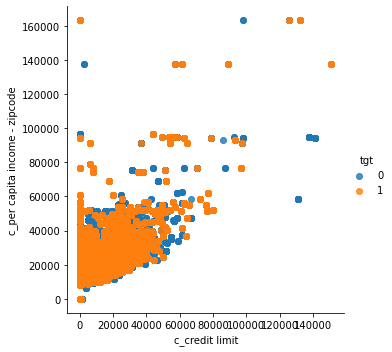

In [57]:
sns.lmplot(x = 'c_credit limit', y='c_per capita income - zipcode', data=df, fit_reg=False ,hue='tgt')

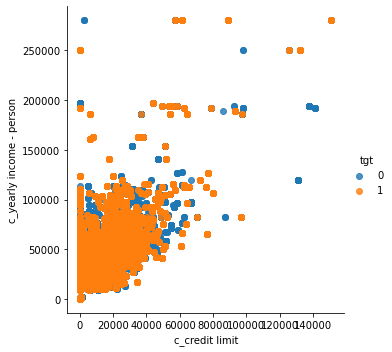

In [58]:
sns.lmplot(x = 'c_credit limit', y='c_yearly income - person', data=df, fit_reg=False ,hue='tgt')

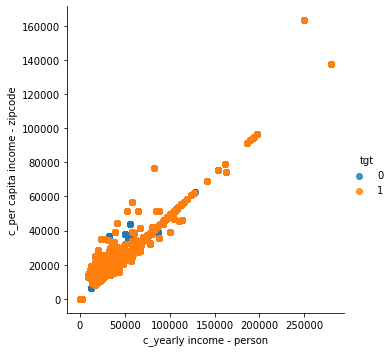

In [59]:
sns.lmplot(x = 'c_yearly income - person', y='c_per capita income - zipcode', data=df, fit_reg=False ,hue='tgt')

In [60]:
# La gráfica anrerior nos muestra una relación peculiar, entre mayor es la ganancia personal, parece ser foco de los atacantes

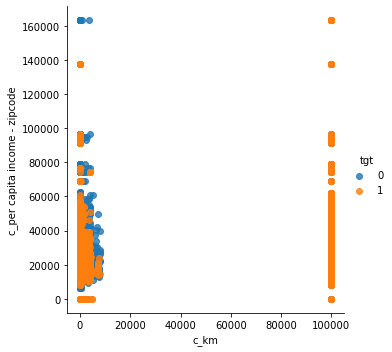

In [61]:
sns.lmplot(x = 'c_km', y='c_per capita income - zipcode', data=df, fit_reg=False ,hue='tgt')

In [62]:
# Definitivamente hay una relación entre la distancia y el fraude

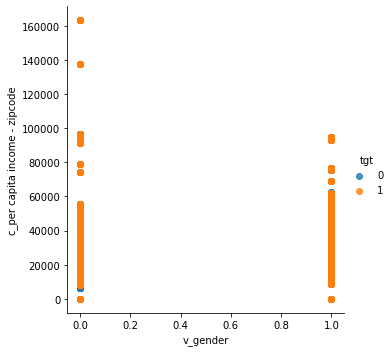

In [63]:
sns.lmplot(x = 'v_gender', y='c_per capita income - zipcode', data=df, fit_reg=False ,hue='tgt')

In [64]:
# Las mujeres que habitan en zonas de más altos ingresos son más propensas a ser víctimas de frade de fraude que los hombres

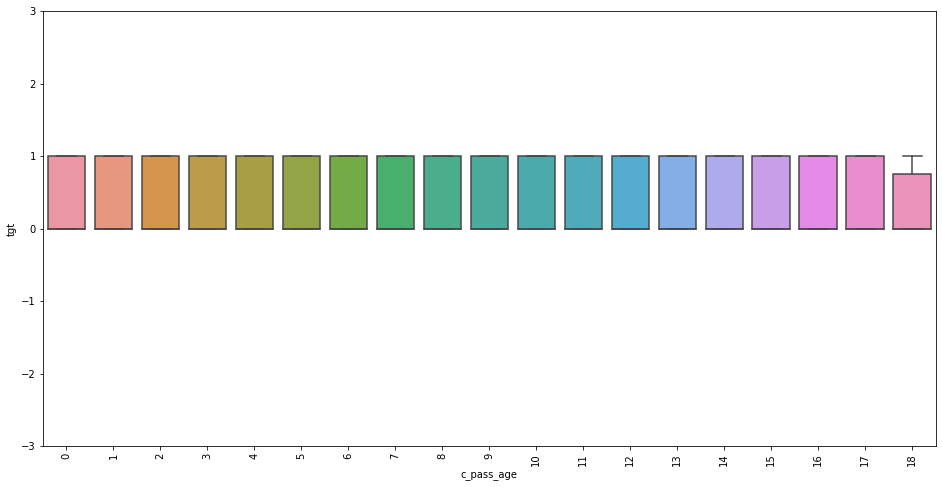

In [65]:
var = 'c_pass_age'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="tgt", data=df)
fig.axis(ymin=-3, ymax=3);
plt.xticks(rotation=90);

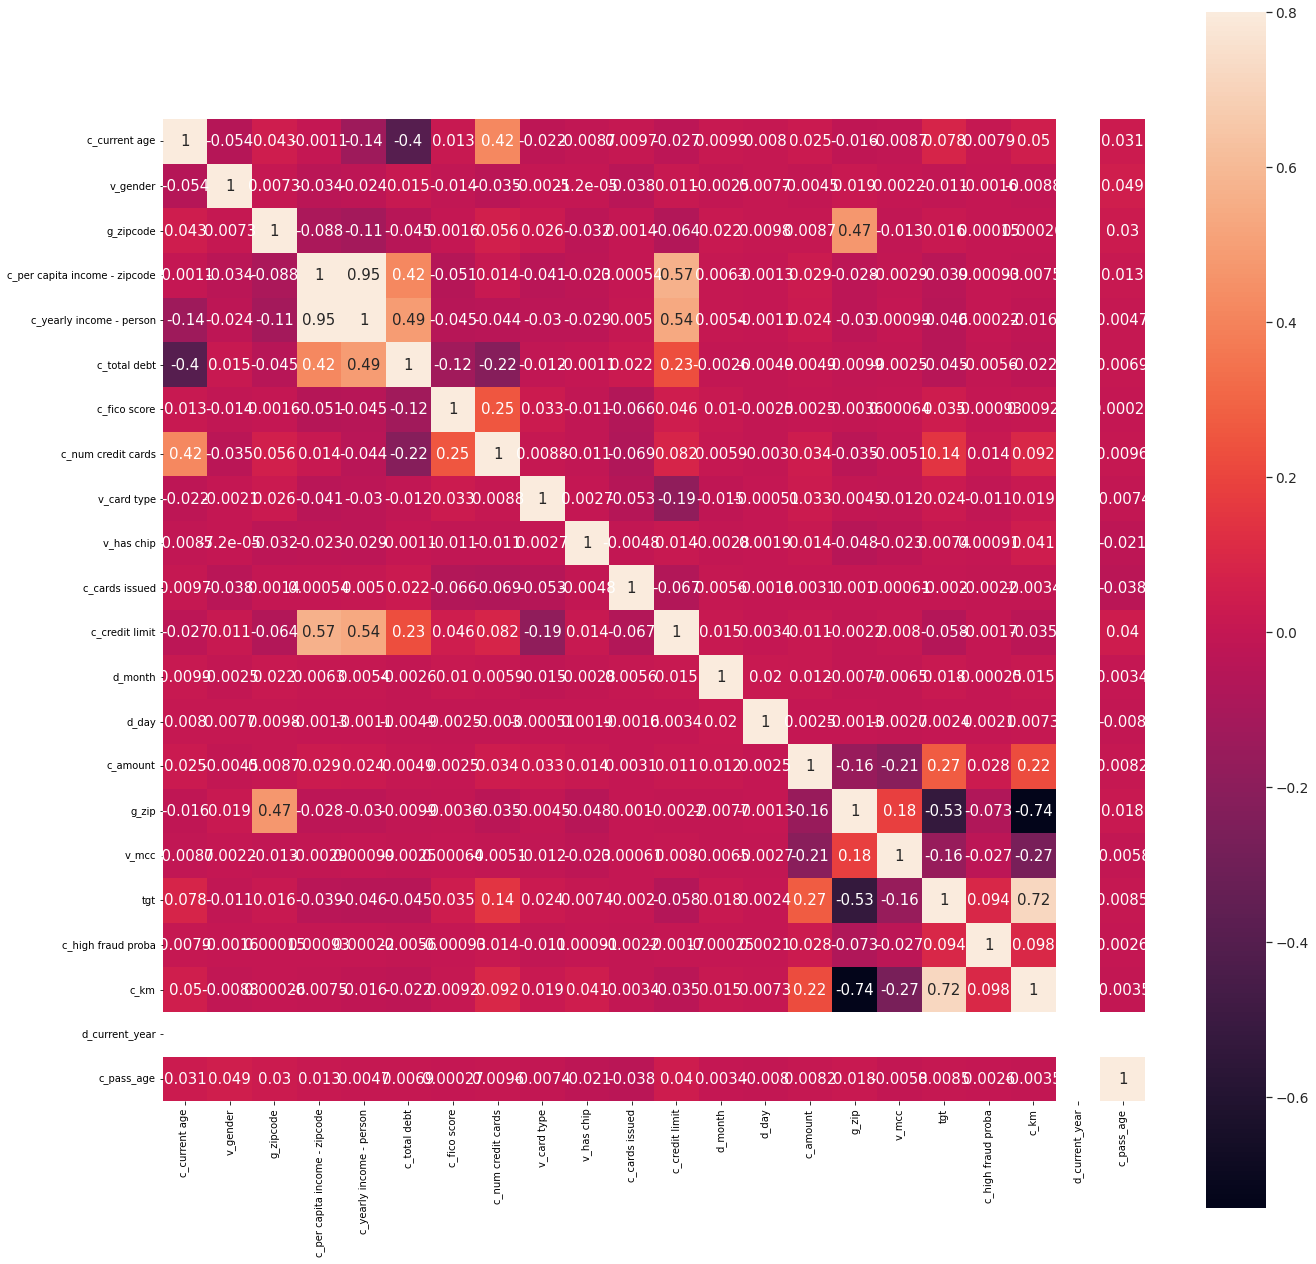

In [66]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

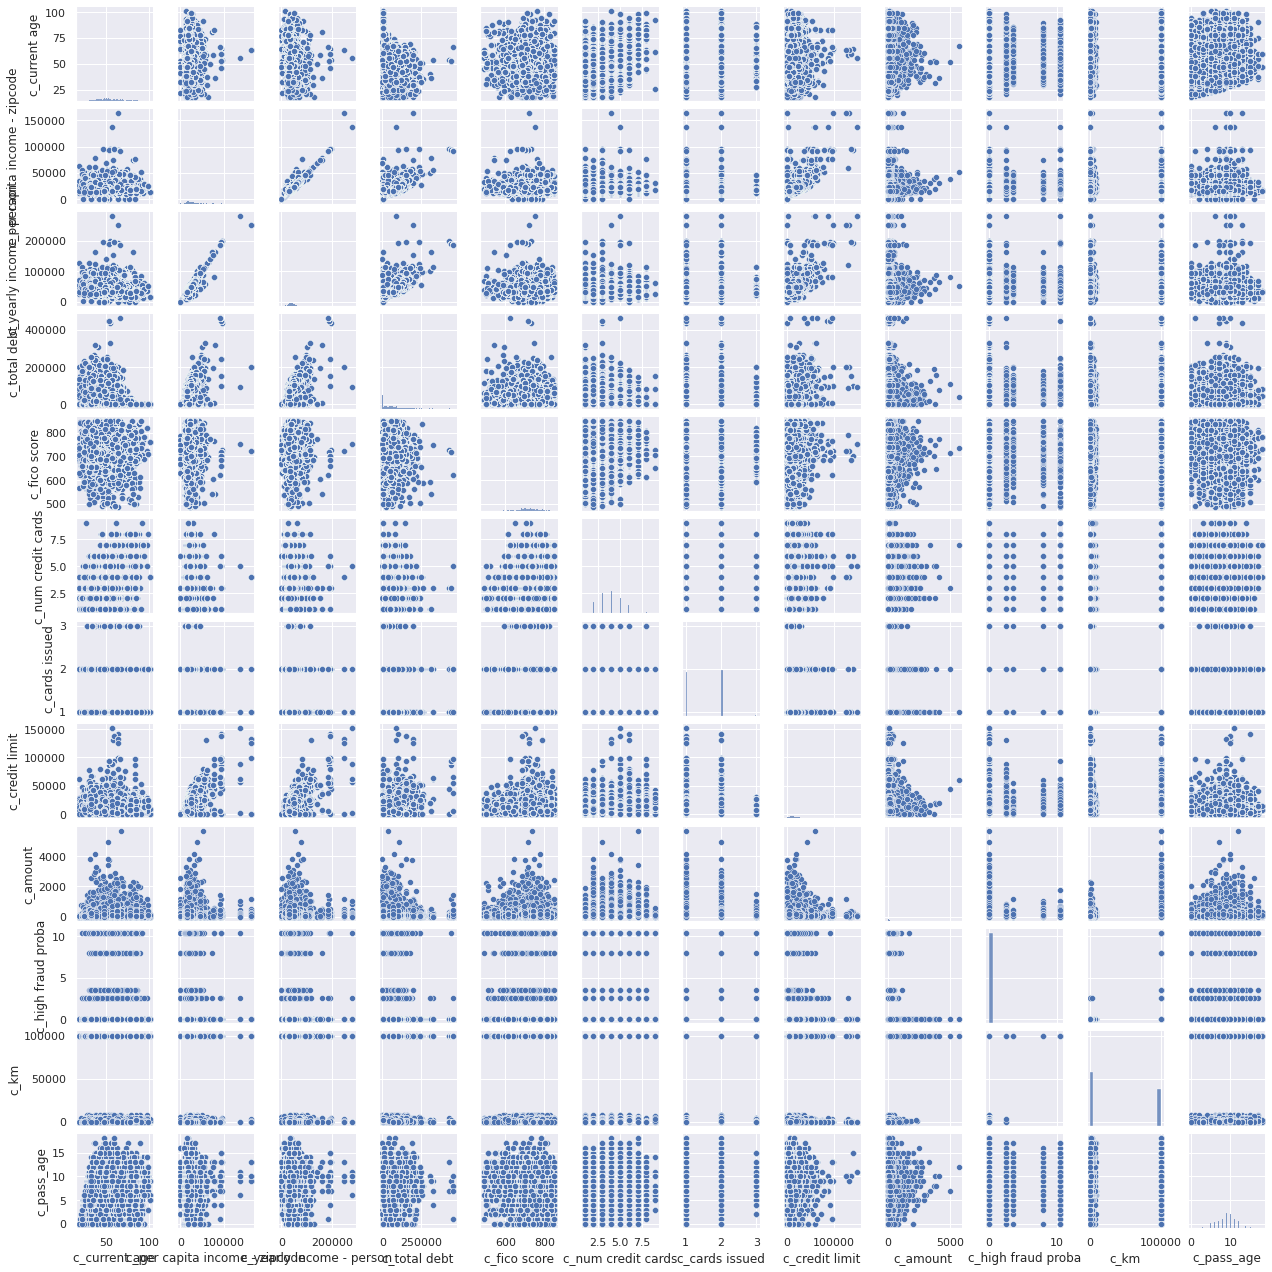

In [67]:
sns.set()
cols = list(df.filter(like='c_'))
sns.pairplot(df[cols], size = 1.5)
plt.show();

Al tratarse de un problema de clasificación, no tenemos que verificar supuestos gráficamente, para estos problemas es hasta cierto punto más importante centrarse en segmentar los datos, por lo que no se ve ninguna otra exploración visual o estadística que sea de interés.

# 5. Feature selection

### Escalado de variables

Para este caso se utilizará minmax escaler, debido a la característica que tiene de manetener la segmentación en los datos y como se dijo, es algo que buscamos en términos de los problemas de clasificación.

In [68]:
df.head()

,c_current age,v_gender,g_city,g_state,g_zipcode,c_per capita income - zipcode,c_yearly income - person,c_total debt,c_fico score,c_num credit cards,v_card brand,v_card type,v_has chip,c_cards issued,c_credit limit,d_acct open date,d_month,d_day,d_time,c_amount,v_use chip,g_merchant city,g_merchant state,g_zip,v_mcc,tgt,c_high fraud proba,c_km,d_current_year,c_pass_age
0,53,0,La Verne,CA,91750,29278,59696,127613,787,5,Visa,0,1,2,24295,09/2002,6,28,13:19,10.55,Swipe Transaction,La Verne,CA,91750,5812,0,0.0,0.000000,2020,12
1,53,0,La Verne,CA,91750,29278,59696,127613,787,5,Visa,0,1,2,24295,09/2002,10,14,20:19,58.47,Swipe Transaction,Mira Loma,CA,91752,5812,0,0.0,26.513374,2020,12
2,53,0,La Verne,CA,91750,29278,59696,127613,787,5,Visa,0,1,2,24295,09/2002,8,8,06:15,129.18,Swipe Transaction,Monterey Park,CA,91754,5411,0,0.0,33.540588,2020,12
3,53,0,La Verne,CA,91750,29278,59696,127613,787,5,Visa,0,1,2,24295,09/2002,9,4,09:55,48.86,Swipe Transaction,La Verne,CA,91750,7538,0,0.0,0.000000,2020,12
4,53,0,La Verne,CA,91750,29278,59696,127613,787,5,Visa,0,1,2,24295,09/2002,6,10,17:43,5.29,Online Transaction,ONLINE,ONLINE,0,5815,0,0.0,99999.000000,2020,12


In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
c_vars = list(df.filter(like='c_'))
c_vars

['c_current age',
 'c_per capita income - zipcode',
 'c_yearly income - person',
 'c_total debt',
 'c_fico score',
 'c_num credit cards',
 'c_cards issued',
 'c_credit limit',
 'c_amount',
 'c_high fraud proba',
 'c_km',
 'c_pass_age']

In [71]:
c_vars = ['c_per capita income - zipcode', 'c_yearly income - person', 'c_total debt',
          'c_credit limit', 'c_amount', 'c_high fraud proba', 'c_pass_age', 'c_km']

In [72]:
scaler = MinMaxScaler()
mm_df = df.copy()
mm_df[c_vars] = pd.DataFrame(scaler.fit_transform(mm_df[c_vars]), columns=c_vars)

In [73]:
mm_df.head()

,c_current age,v_gender,g_city,g_state,g_zipcode,c_per capita income - zipcode,c_yearly income - person,c_total debt,c_fico score,c_num credit cards,v_card brand,v_card type,v_has chip,c_cards issued,c_credit limit,d_acct open date,d_month,d_day,d_time,c_amount,v_use chip,g_merchant city,g_merchant state,g_zip,v_mcc,tgt,c_high fraud proba,c_km,d_current_year,c_pass_age
0,53,0,La Verne,CA,91750,0.17946,0.213046,0.276306,787,5,Visa,0,1,2,0.160657,09/2002,6,28,13:19,0.001853,Swipe Transaction,La Verne,CA,91750,5812,0,0.0,0.000000,2020,0.666667
1,53,0,La Verne,CA,91750,0.17946,0.213046,0.276306,787,5,Visa,0,1,2,0.160657,09/2002,10,14,20:19,0.010268,Swipe Transaction,Mira Loma,CA,91752,5812,0,0.0,0.000265,2020,0.666667
2,53,0,La Verne,CA,91750,0.17946,0.213046,0.276306,787,5,Visa,0,1,2,0.160657,09/2002,8,8,06:15,0.022685,Swipe Transaction,Monterey Park,CA,91754,5411,0,0.0,0.000335,2020,0.666667
3,53,0,La Verne,CA,91750,0.17946,0.213046,0.276306,787,5,Visa,0,1,2,0.160657,09/2002,9,4,09:55,0.008580,Swipe Transaction,La Verne,CA,91750,7538,0,0.0,0.000000,2020,0.666667
4,53,0,La Verne,CA,91750,0.17946,0.213046,0.276306,787,5,Visa,0,1,2,0.160657,09/2002,6,10,17:43,0.000929,Online Transaction,ONLINE,ONLINE,0,5815,0,0.0,1.000000,2020,0.666667


In [74]:
# Como ya se calculó la variable de los kilómetros, se consideran como innecesarias las variables correspondientes con ciudad, estado, etc

mm_df.drop(['g_state', 'g_city', 'g_merchant state', 'g_merchant city'], axis=1, inplace=True)

# de igual modo con los codigos postales

mm_df.drop(['g_zip', 'g_zipcode'], axis=1, inplace=True)


In [75]:
# La fecha de apertura no es clara, si es la fecha de apertura de la cuenta o es la fecha de activación de la tarjeta, parece ser más lo pirmero, por lo que no parece ser muy relevante, ya que los fraudes ban por tarjeta, no por cuenta

mm_df.drop(['d_acct open date'], axis=1, inplace=True)

In [76]:
# la hora de la transacción
mm_df.drop(['d_time'], axis=1, inplace=True)

In [77]:
v_vars = ['v_card brand', 'v_use chip', 'v_mcc']

In [78]:
mm_df = pd.get_dummies(mm_df, columns=v_vars, prefix_sep='_', drop_first=True)

In [79]:
#Select KBest
from sklearn.feature_selection import SelectKBest

y = df['tgt'].copy()
v = list(mm_df.columns)
v.pop(v.index('tgt'))
x = mm_df[v].copy()

In [80]:
kb = SelectKBest(k = 20)
z = kb.fit_transform(x, y)

filtro = kb.get_support()
var = np.array(x.columns)

del(x)
del(y)

In [81]:
var[filtro]

array(['c_num credit cards', 'c_amount', 'c_high fraud proba', 'c_km',
       'v_use chip_Online Transaction', 'v_use chip_Swipe Transaction',
       'v_mcc_4784', 'v_mcc_4900', 'v_mcc_5045', 'v_mcc_5094',
       'v_mcc_5310', 'v_mcc_5311', 'v_mcc_5411', 'v_mcc_5499',
       'v_mcc_5541', 'v_mcc_5651', 'v_mcc_5732', 'v_mcc_5812',
       'v_mcc_5815', 'v_mcc_7538'], dtype=object)

In [82]:
predictors = list(var[filtro])

In [83]:
mm_df[predictors].head()

,c_num credit cards,c_amount,c_high fraud proba,c_km,v_use chip_Online Transaction,v_use chip_Swipe Transaction,v_mcc_4784,v_mcc_4900,v_mcc_5045,v_mcc_5094,v_mcc_5310,v_mcc_5311,v_mcc_5411,v_mcc_5499,v_mcc_5541,v_mcc_5651,v_mcc_5732,v_mcc_5812,v_mcc_5815,v_mcc_7538
0,5,0.001853,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5,0.010268,0.0,0.000265,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5,0.022685,0.0,0.000335,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,5,0.008580,0.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0.000929,0.0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# 6. Modeling

In [84]:
# Preparación de datos de prueba y entrenammiento
from sklearn.model_selection import train_test_split
X = mm_df[predictors].copy()
y = mm_df['tgt'].copy()

Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.3, random_state=65416542)
del(X) #Hay que ahorrar memoria xD
del(y)

In [85]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

tuleka = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=123,
    logging_level='Verbose'
)

In [86]:
tuleka.fit(
    Xt, yt,
    eval_set=(Xv, yv),
    logging_level='Verbose',
    plot=True
);


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.084007
0:	learn: 0.6022460	test: 0.6030141	best: 0.6030141 (0)	total: 56.5ms	remaining: 56.5s
1:	learn: 0.5331755	test: 0.5345758	best: 0.5345758 (1)	total: 64.2ms	remaining: 32s
2:	learn: 0.4823793	test: 0.4844073	best: 0.4844073 (2)	total: 72ms	remaining: 23.9s
3:	learn: 0.4428718	test: 0.4457029	best: 0.4457029 (3)	total: 78.9ms	remaining: 19.6s
4:	learn: 0.4097424	test: 0.4130577	best: 0.4130577 (4)	total: 86ms	remaining: 17.1s
5:	learn: 0.3865999	test: 0.3904856	best: 0.3904856 (5)	total: 93.3ms	remaining: 15.5s
6:	learn: 0.3678669	test: 0.3719183	best: 0.3719183 (6)	total: 99.6ms	remaining: 14.1s
7:	learn: 0.3501999	test: 0.3547359	best: 0.3547359 (7)	total: 106ms	remaining: 13.2s
8:	learn: 0.3376182	test: 0.3426254	best: 0.3426254 (8)	total: 114ms	remaining: 12.5s
9:	learn: 0.3272260	test: 0.3325776	best: 0.3325776 (9)	total: 122ms	remaining: 12.1s
10:	learn: 0.3167481	test: 0.3223094	best: 0.3223094 (10)	total: 131ms	remaining: 11.8s
11:	learn: 0.3103323	

110:	learn: 0.2261344	test: 0.2381305	best: 0.2381305 (110)	total: 790ms	remaining: 6.33s
111:	learn: 0.2259683	test: 0.2379722	best: 0.2379722 (111)	total: 797ms	remaining: 6.32s
112:	learn: 0.2258111	test: 0.2378467	best: 0.2378467 (112)	total: 805ms	remaining: 6.32s
113:	learn: 0.2257313	test: 0.2377730	best: 0.2377730 (113)	total: 811ms	remaining: 6.3s
114:	learn: 0.2255887	test: 0.2376805	best: 0.2376805 (114)	total: 818ms	remaining: 6.29s
115:	learn: 0.2255144	test: 0.2376450	best: 0.2376450 (115)	total: 825ms	remaining: 6.28s
116:	learn: 0.2253062	test: 0.2375253	best: 0.2375253 (116)	total: 832ms	remaining: 6.28s
117:	learn: 0.2251899	test: 0.2374708	best: 0.2374708 (117)	total: 840ms	remaining: 6.28s
118:	learn: 0.2250805	test: 0.2373981	best: 0.2373981 (118)	total: 848ms	remaining: 6.28s
119:	learn: 0.2249869	test: 0.2373367	best: 0.2373367 (119)	total: 856ms	remaining: 6.28s
120:	learn: 0.2248837	test: 0.2372557	best: 0.2372557 (120)	total: 864ms	remaining: 6.28s
121:	learn:

226:	learn: 0.2130038	test: 0.2295710	best: 0.2295710 (226)	total: 1.58s	remaining: 5.38s
227:	learn: 0.2129453	test: 0.2295709	best: 0.2295709 (227)	total: 1.58s	remaining: 5.37s
228:	learn: 0.2128952	test: 0.2295745	best: 0.2295709 (227)	total: 1.59s	remaining: 5.36s
229:	learn: 0.2127991	test: 0.2295023	best: 0.2295023 (229)	total: 1.6s	remaining: 5.35s
230:	learn: 0.2126962	test: 0.2294656	best: 0.2294656 (230)	total: 1.6s	remaining: 5.34s
231:	learn: 0.2126340	test: 0.2294520	best: 0.2294520 (231)	total: 1.61s	remaining: 5.33s
232:	learn: 0.2125859	test: 0.2294475	best: 0.2294475 (232)	total: 1.62s	remaining: 5.32s
233:	learn: 0.2125001	test: 0.2294225	best: 0.2294225 (233)	total: 1.62s	remaining: 5.31s
234:	learn: 0.2124630	test: 0.2294235	best: 0.2294225 (233)	total: 1.63s	remaining: 5.3s
235:	learn: 0.2124016	test: 0.2294343	best: 0.2294225 (233)	total: 1.64s	remaining: 5.29s
236:	learn: 0.2123453	test: 0.2293918	best: 0.2293918 (236)	total: 1.64s	remaining: 5.29s
237:	learn: 0

319:	learn: 0.2075298	test: 0.2278224	best: 0.2278224 (319)	total: 2.17s	remaining: 4.62s
320:	learn: 0.2075027	test: 0.2278195	best: 0.2278195 (320)	total: 2.18s	remaining: 4.61s
321:	learn: 0.2074205	test: 0.2277627	best: 0.2277627 (321)	total: 2.18s	remaining: 4.6s
322:	learn: 0.2073690	test: 0.2277602	best: 0.2277602 (322)	total: 2.19s	remaining: 4.59s
323:	learn: 0.2073086	test: 0.2277629	best: 0.2277602 (322)	total: 2.2s	remaining: 4.58s
324:	learn: 0.2072657	test: 0.2277369	best: 0.2277369 (324)	total: 2.2s	remaining: 4.58s
325:	learn: 0.2072179	test: 0.2277026	best: 0.2277026 (325)	total: 2.21s	remaining: 4.57s
326:	learn: 0.2071797	test: 0.2276919	best: 0.2276919 (326)	total: 2.21s	remaining: 4.56s
327:	learn: 0.2071428	test: 0.2276871	best: 0.2276871 (327)	total: 2.22s	remaining: 4.55s
328:	learn: 0.2070606	test: 0.2276553	best: 0.2276553 (328)	total: 2.22s	remaining: 4.54s
329:	learn: 0.2070209	test: 0.2276617	best: 0.2276553 (328)	total: 2.23s	remaining: 4.53s
330:	learn: 0

442:	learn: 0.2018723	test: 0.2265418	best: 0.2265104 (435)	total: 2.95s	remaining: 3.71s
443:	learn: 0.2018481	test: 0.2265451	best: 0.2265104 (435)	total: 2.96s	remaining: 3.7s
444:	learn: 0.2018285	test: 0.2265515	best: 0.2265104 (435)	total: 2.96s	remaining: 3.7s
445:	learn: 0.2017882	test: 0.2265430	best: 0.2265104 (435)	total: 2.97s	remaining: 3.69s
446:	learn: 0.2017667	test: 0.2265519	best: 0.2265104 (435)	total: 2.97s	remaining: 3.68s
447:	learn: 0.2017284	test: 0.2265467	best: 0.2265104 (435)	total: 2.98s	remaining: 3.67s
448:	learn: 0.2016866	test: 0.2265284	best: 0.2265104 (435)	total: 2.98s	remaining: 3.66s
449:	learn: 0.2016240	test: 0.2265001	best: 0.2265001 (449)	total: 2.99s	remaining: 3.65s
450:	learn: 0.2015997	test: 0.2265173	best: 0.2265001 (449)	total: 3s	remaining: 3.65s
451:	learn: 0.2015851	test: 0.2265119	best: 0.2265001 (449)	total: 3s	remaining: 3.64s
452:	learn: 0.2015497	test: 0.2265081	best: 0.2265001 (449)	total: 3.01s	remaining: 3.63s
453:	learn: 0.2015

548:	learn: 0.1978460	test: 0.2261890	best: 0.2261540 (526)	total: 3.54s	remaining: 2.9s
549:	learn: 0.1978078	test: 0.2262003	best: 0.2261540 (526)	total: 3.54s	remaining: 2.9s
550:	learn: 0.1977803	test: 0.2261971	best: 0.2261540 (526)	total: 3.55s	remaining: 2.89s
551:	learn: 0.1977510	test: 0.2262047	best: 0.2261540 (526)	total: 3.56s	remaining: 2.89s
552:	learn: 0.1977031	test: 0.2261861	best: 0.2261540 (526)	total: 3.56s	remaining: 2.88s
553:	learn: 0.1976723	test: 0.2261818	best: 0.2261540 (526)	total: 3.57s	remaining: 2.87s
554:	learn: 0.1976502	test: 0.2261771	best: 0.2261540 (526)	total: 3.58s	remaining: 2.87s
555:	learn: 0.1976122	test: 0.2261788	best: 0.2261540 (526)	total: 3.58s	remaining: 2.86s
556:	learn: 0.1975743	test: 0.2261524	best: 0.2261524 (556)	total: 3.59s	remaining: 2.85s
557:	learn: 0.1975431	test: 0.2261607	best: 0.2261524 (556)	total: 3.6s	remaining: 2.85s
558:	learn: 0.1975235	test: 0.2261653	best: 0.2261524 (556)	total: 3.6s	remaining: 2.84s
559:	learn: 0.

641:	learn: 0.1946204	test: 0.2258855	best: 0.2258808 (640)	total: 4.13s	remaining: 2.3s
642:	learn: 0.1945958	test: 0.2259030	best: 0.2258808 (640)	total: 4.13s	remaining: 2.29s
643:	learn: 0.1945474	test: 0.2259427	best: 0.2258808 (640)	total: 4.14s	remaining: 2.29s
644:	learn: 0.1945228	test: 0.2259347	best: 0.2258808 (640)	total: 4.14s	remaining: 2.28s
645:	learn: 0.1944574	test: 0.2258788	best: 0.2258788 (645)	total: 4.15s	remaining: 2.27s
646:	learn: 0.1944378	test: 0.2258804	best: 0.2258788 (645)	total: 4.16s	remaining: 2.27s
647:	learn: 0.1944223	test: 0.2258798	best: 0.2258788 (645)	total: 4.16s	remaining: 2.26s
648:	learn: 0.1943886	test: 0.2258877	best: 0.2258788 (645)	total: 4.17s	remaining: 2.25s
649:	learn: 0.1943548	test: 0.2258819	best: 0.2258788 (645)	total: 4.18s	remaining: 2.25s
650:	learn: 0.1943308	test: 0.2258633	best: 0.2258633 (650)	total: 4.18s	remaining: 2.24s
651:	learn: 0.1943098	test: 0.2258753	best: 0.2258633 (650)	total: 4.19s	remaining: 2.24s
652:	learn:

738:	learn: 0.1917710	test: 0.2257167	best: 0.2257167 (738)	total: 4.71s	remaining: 1.67s
739:	learn: 0.1917515	test: 0.2257268	best: 0.2257167 (738)	total: 4.72s	remaining: 1.66s
740:	learn: 0.1917321	test: 0.2257328	best: 0.2257167 (738)	total: 4.73s	remaining: 1.65s
741:	learn: 0.1916995	test: 0.2257342	best: 0.2257167 (738)	total: 4.73s	remaining: 1.65s
742:	learn: 0.1916533	test: 0.2257263	best: 0.2257167 (738)	total: 4.74s	remaining: 1.64s
743:	learn: 0.1916265	test: 0.2257086	best: 0.2257086 (743)	total: 4.74s	remaining: 1.63s
744:	learn: 0.1916018	test: 0.2257193	best: 0.2257086 (743)	total: 4.75s	remaining: 1.63s
745:	learn: 0.1915786	test: 0.2257081	best: 0.2257081 (745)	total: 4.75s	remaining: 1.62s
746:	learn: 0.1915534	test: 0.2256772	best: 0.2256772 (746)	total: 4.76s	remaining: 1.61s
747:	learn: 0.1914985	test: 0.2256976	best: 0.2256772 (746)	total: 4.76s	remaining: 1.6s
748:	learn: 0.1914776	test: 0.2256751	best: 0.2256751 (748)	total: 4.77s	remaining: 1.6s
749:	learn: 

836:	learn: 0.1890360	test: 0.2258059	best: 0.2256361 (765)	total: 5.3s	remaining: 1.03s
837:	learn: 0.1890152	test: 0.2258096	best: 0.2256361 (765)	total: 5.3s	remaining: 1.02s
838:	learn: 0.1889871	test: 0.2258224	best: 0.2256361 (765)	total: 5.31s	remaining: 1.02s
839:	learn: 0.1889527	test: 0.2257977	best: 0.2256361 (765)	total: 5.32s	remaining: 1.01s
840:	learn: 0.1889328	test: 0.2258049	best: 0.2256361 (765)	total: 5.32s	remaining: 1.01s
841:	learn: 0.1889110	test: 0.2258035	best: 0.2256361 (765)	total: 5.33s	remaining: 1s
842:	learn: 0.1888815	test: 0.2258058	best: 0.2256361 (765)	total: 5.34s	remaining: 994ms
843:	learn: 0.1888730	test: 0.2258135	best: 0.2256361 (765)	total: 5.34s	remaining: 987ms
844:	learn: 0.1888429	test: 0.2258053	best: 0.2256361 (765)	total: 5.35s	remaining: 981ms
845:	learn: 0.1888121	test: 0.2258042	best: 0.2256361 (765)	total: 5.36s	remaining: 975ms
846:	learn: 0.1887904	test: 0.2257931	best: 0.2256361 (765)	total: 5.36s	remaining: 969ms
847:	learn: 0.1

939:	learn: 0.1864492	test: 0.2259469	best: 0.2256361 (765)	total: 5.88s	remaining: 375ms
940:	learn: 0.1864280	test: 0.2259436	best: 0.2256361 (765)	total: 5.88s	remaining: 369ms
941:	learn: 0.1864141	test: 0.2259582	best: 0.2256361 (765)	total: 5.89s	remaining: 363ms
942:	learn: 0.1863922	test: 0.2259708	best: 0.2256361 (765)	total: 5.9s	remaining: 357ms
943:	learn: 0.1863673	test: 0.2259758	best: 0.2256361 (765)	total: 5.91s	remaining: 351ms
944:	learn: 0.1863406	test: 0.2259934	best: 0.2256361 (765)	total: 5.92s	remaining: 344ms
945:	learn: 0.1863092	test: 0.2259841	best: 0.2256361 (765)	total: 5.92s	remaining: 338ms
946:	learn: 0.1862900	test: 0.2260071	best: 0.2256361 (765)	total: 5.93s	remaining: 332ms
947:	learn: 0.1862595	test: 0.2259949	best: 0.2256361 (765)	total: 5.93s	remaining: 325ms
948:	learn: 0.1862064	test: 0.2259742	best: 0.2256361 (765)	total: 5.94s	remaining: 319ms
949:	learn: 0.1861842	test: 0.2259688	best: 0.2256361 (765)	total: 5.95s	remaining: 313ms
950:	learn:

In [87]:
predictedXt = tuleka.predict(Xt)
predcitedyt = tuleka.predict(Xv)

In [88]:
print(classification_report(yt, predictedXt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     30975
           1       0.91      0.91      0.91     20808

    accuracy                           0.93     51783
   macro avg       0.92      0.92      0.92     51783
weighted avg       0.93      0.93      0.93     51783



In [89]:
print(classification_report(yv, predcitedyt))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     13244
           1       0.89      0.89      0.89      8949

    accuracy                           0.91     22193
   macro avg       0.91      0.91      0.91     22193
weighted avg       0.91      0.91      0.91     22193



In [90]:
#Excelentes resutlados, pero por el puro honor... Hagamos un gridsearch CV de una regresión logística, por el amor que le tengo a ese modelo

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

lr=LogisticRegression()
lr_cv=GridSearchCV(lr,grid,cv=10)
lr_cv.fit(Xt,yt)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [91]:
print("Hiper parámetros :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

Hiper parámetros :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.9002375445717699


In [92]:
#Bien!

lr=LogisticRegression(C=100, penalty="l2")
lr.fit(Xt,yt)

LogisticRegression(C=100)

In [93]:
predictedXt = lr.predict(Xt)
predcitedyv = lr.predict(Xv)

In [94]:
print(classification_report(yt, predictedXt))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     30975
           1       0.89      0.86      0.87     20808

    accuracy                           0.90     51783
   macro avg       0.90      0.89      0.90     51783
weighted avg       0.90      0.90      0.90     51783



In [95]:
print(classification_report(yv, predcitedyt))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     13244
           1       0.89      0.85      0.87      8949

    accuracy                           0.90     22193
   macro avg       0.89      0.89      0.89     22193
weighted avg       0.90      0.90      0.90     22193



In [96]:
#Regresión logística pierde un poquito en el recall frente a catboost, pero son excelentes resultados!

#Ahora probemos con XGB

In [103]:
import xgboost as xgb

xgb_God = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=8,
    seed=6542
)

parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': range(100, 500, 100),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=xgb_God,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [100]:
grid_search.fit(Xt, yt)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

[13:42:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:16] WARNING: /home

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

[13:42:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:15] WARNING: /home

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

[13:42:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:17] WARNING: /home

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:42:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:20] WARNING: /home

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:42:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:17] WARNING: /home

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:42:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:12] WARNING: /home

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:42:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:14] WARNING: /home

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

[13:42:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:08] WARNING: /home

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

[13:42:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:15] WARNING: /home

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:42:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:42:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:13] WARNING: /home

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sqpr14_/anaconda3/envs/DSS2/lib/python3.9/site-p

[15:30:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=8,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=6542, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10, 2),
                         'n_estimators': range(100, 500, 100)},
             scoring='roc_auc', verbose=True)

In [101]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 400}

In [108]:
xgb_b = xgb.XGBClassifier(learning_rate=0.05, max_depth=8, n_estimators=400, booster='dart')

In [109]:
xgb_b.fit(Xt, yt)

[17:59:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
print(classification_report(yt, xgb_b.predict(Xt)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     30975
           1       0.91      0.91      0.91     20808

    accuracy                           0.93     51783
   macro avg       0.93      0.93      0.93     51783
weighted avg       0.93      0.93      0.93     51783



In [112]:
print(classification_report(yv, xgb_b.predict(Xv)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     13244
           1       0.89      0.88      0.89      8949

    accuracy                           0.91     22193
   macro avg       0.91      0.91      0.91     22193
weighted avg       0.91      0.91      0.91     22193



In [113]:
Xt.shape

(51783, 20)

In [114]:
Xv.shape

(22193, 20)

In [116]:
import pickle as plk

In [121]:
plk.dump(tuleka, open(path + 'catboost.pkl', 'wb'))

In [122]:
plk.dump(xgb_b, open(path + 'xgb.pkl', 'wb'))

In [123]:
plk.dump(lr, open(path + 'lr.pkl', 'wb'))